In [48]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,validation_curve,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [49]:
import matplotlib.pyplot as plt

In [50]:
from sklearn.tree import export_graphviz,plot_tree

In [51]:
dataset = pd.read_csv("../dataset/data.csv")
dataset

,Body Size,Body Weight,Height,Bone Structure,Com1lexion,General feel of skin,Texture of Skin,Hair Color,A11earance of Hair,Sha1e of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Li1s,Nails,A11etite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [52]:
X=dataset.iloc[:,:-1].values
X

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 1, 2, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 0, 0]], dtype=int64)

In [53]:
Y=dataset.iloc[:,20].values
Y

array([3, 3, 1, ..., 3, 4, 3], dtype=int64)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [55]:
X_train

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 2, 0, 0],
       [2, 1, 2, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 2, 0],
       [0, 0, 1, ..., 1, 2, 2]], dtype=int64)

In [56]:
y_train

array([3, 3, 1, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 5, 3, 4, 3, 1, 3, 3,
       3, 0, 2, 3, 0, 3, 1, 0, 3, 3, 5, 3, 1, 2, 1, 3, 1, 3, 3, 1, 0, 0,
       5, 3, 3, 3, 1, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 5, 3, 3, 0, 1, 3, 3,
       3, 3, 0, 0, 2, 3, 1, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 4, 3, 3, 0,
       3, 3, 1, 3, 3, 3, 4, 1, 3, 5, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3, 0, 3, 3, 3, 2, 3,
       2, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 0, 3, 3,
       0, 0, 4, 3, 3, 3, 3, 5, 2, 3, 1, 3, 0, 0, 0, 0, 3, 0, 5, 3, 3, 3,
       3, 4, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3,
       0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 2, 4, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 3, 5, 3, 0, 3, 3, 3, 3, 3, 5, 3, 3, 1, 1, 3, 3, 5, 0, 3, 3,
       3, 0, 0, 3, 3, 3, 2, 0, 5, 3, 5, 0, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       5, 0, 3, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 4, 3,

In [68]:
tree = DecisionTreeClassifier(random_state=2)

In [69]:
k=KFold(n_splits=5,shuffle=True,random_state=0)

In [70]:
k

KFold(n_splits=5, random_state=0, shuffle=True)

In [71]:
print(cross_val_score(tree,X,dataset.Dosha,cv=k))

[1. 1. 1. 1. 1.]


In [72]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [73]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
1.0


In [74]:
tree_predictions=tree.predict(X_test)

In [75]:
target=["vata","pitta","kapha","vata+pitta","vata+kapha","pitta+kapha"]

In [76]:
export_graphviz(tree,out_file="tree.jpg",class_names=target,feature_names=dataset.columns[0:20],impurity=False,filled=True)

[]

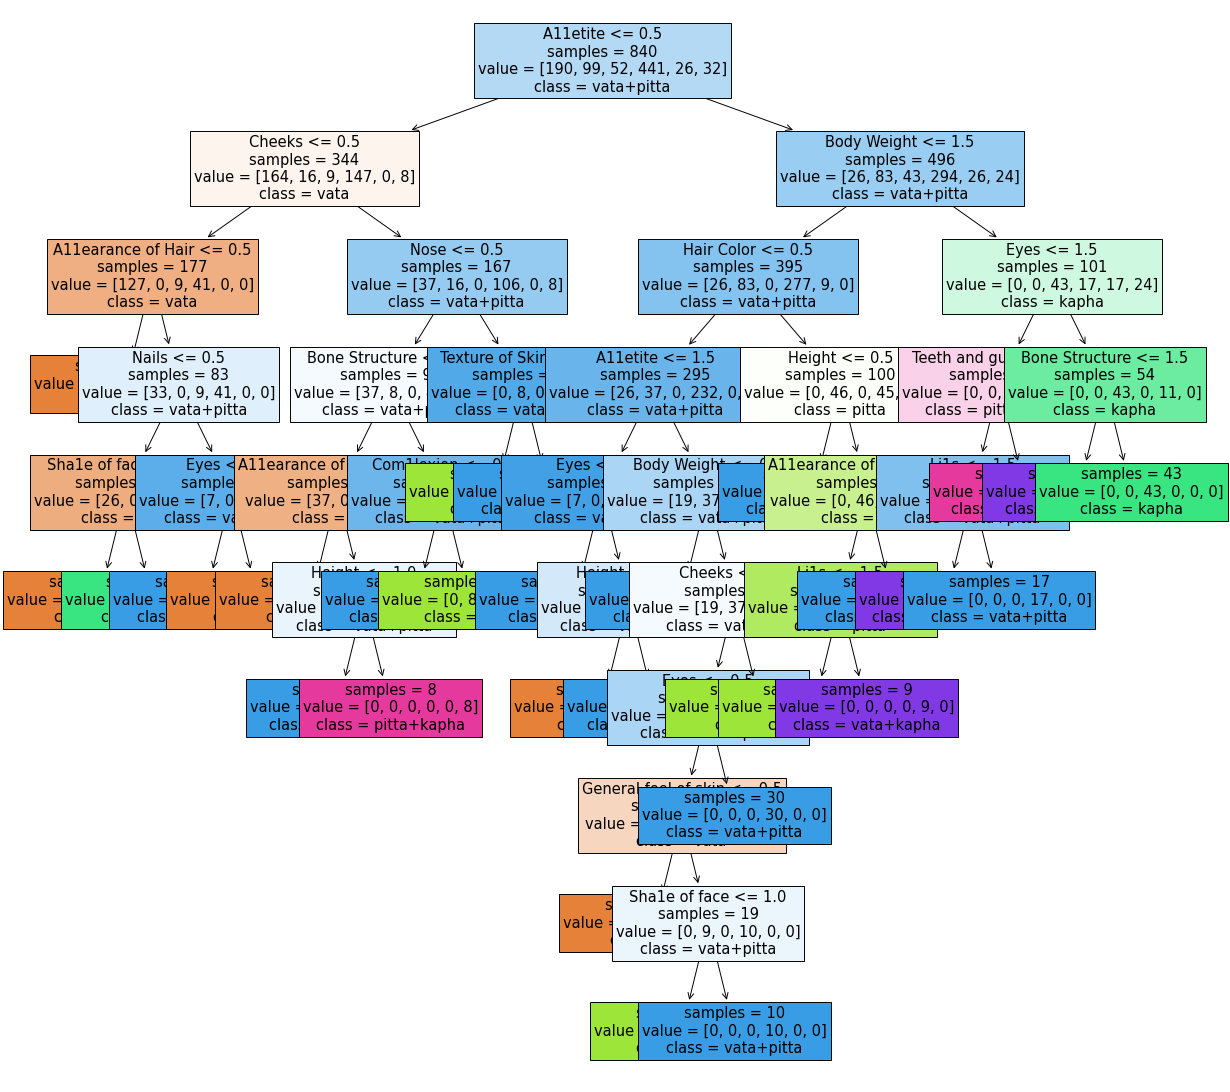

In [77]:
plt.figure(figsize=(20,20),dpi=70)
plot_tree(tree,class_names=target,fontsize=15,feature_names=dataset.columns[0:20],impurity=False,filled=True)
plt.plot()

In [78]:
accuracy_score(y_test,tree_predictions)

1.0

In [81]:
cm=confusion_matrix(y_test, tree_predictions)

In [82]:
cm

array([[ 74,   0,   0,   0,   0,   0],
       [  0,  45,   0,   0,   0,   0],
       [  0,   0,  20,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0],
       [  0,   0,   0,   0,  22,   0],
       [  0,   0,   0,   0,   0,  16]], dtype=int64)

[]

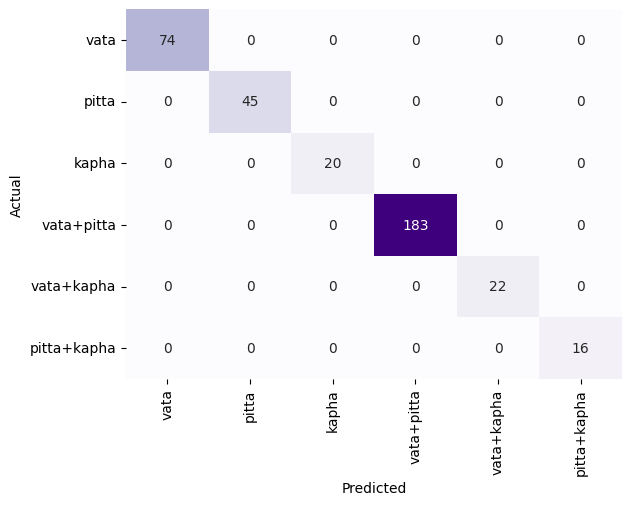

In [90]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target,yticklabels=target,cbar=False,cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [84]:
from matplotlib import colormaps

In [85]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [87]:
print(recall_score(y_test,tree_predictions,average="weighted"))

1.0


In [88]:
print(precision_score(y_test,tree_predictions,average="weighted"))

1.0


In [89]:
print(f1_score(y_test,tree_predictions,average="weighted"))

1.0
